# Questrade Portfolio Manager

In [1]:
import os
import math
import requests
import numpy as np
import src.credentials as cred
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from src.questrade import QuestradeBot

## Personal Inputs and QuestradeBot Initialization

In [10]:
ACCOUNT_NUM = cred.QUESTRADE_ACCOUNT_NUM
QUESTRADE_TOKEN = cred.QUESTRADE_API_CODE
qbot = QuestradeBot(QUESTRADE_TOKEN, ACCOUNT_NUM)

## Account Balance

In [4]:
balance = qbot.get_balance()
balance

,Cash,Market_Value,Total_Equity,Cash (%),Investment (%)
Currency,,,,,
CAD,31785.3365,0.00,31785.3365,100.0,0.0
USD,21744.9715,10328.78,32073.7515,67.8,32.2


## Portfolio Holdings

In [5]:
portfolio = qbot.get_investment_summary()
portfolio

,Description,Currency,Quantities,Market Value,Return (%),Portfolio (%)
MMM,3M COMPANY,USD,3,539.52,-8.66,5.22
O,REALTY INCOME CORP,USD,75,5082.00,10.72,49.20
JPM,JPMORGAN CHASE & CO.,USD,6,935.46,1.60,9.06
VTI,VANGUARD INDEX FUNDS VANGUARD TOTAL STOCK MARK...,USD,3,681.96,16.17,6.60
QQQ,INVESCO QQQ TRUST UNIT SER 1,USD,2,739.14,15.61,7.16
GLD,SPDR GOLD TRUST GOLD SHARES NPV,USD,7,1157.94,-5.09,11.21
TLT,ISHARES TRUST BARCLAYS 20+ TREAS BD FD TO 07/0...,USD,4,607.16,0.08,5.88
IEF,ISHARES TRUST BARCLAYS 7-10 YEAR TREASURY BOND...,USD,5,585.60,-1.28,5.67


<AxesSubplot:title={'center':'Portfolio Breakdown'}, ylabel='Portfolio (%)'>

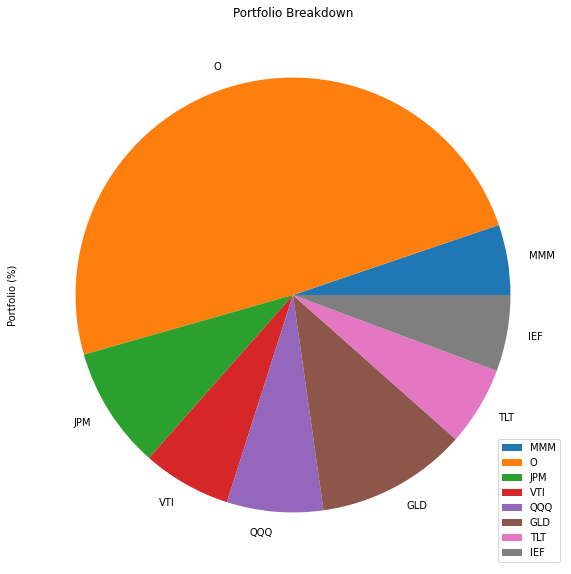

In [7]:
portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

## Portfolio Return

In [6]:
portfolio_return = (portfolio['Return (%)'].dot(portfolio['Portfolio (%)'])) / 100
portfolio_return

6.513583000000001

## Monthly Dividend Income

In [8]:
div = qbot.get_dividend_income()
div.loc['Total'] = div.sum(numeric_only=True, axis=0)

<AxesSubplot:title={'center':'Monthly Dividend Payments'}, xlabel='Months', ylabel='Dividend ($)'>

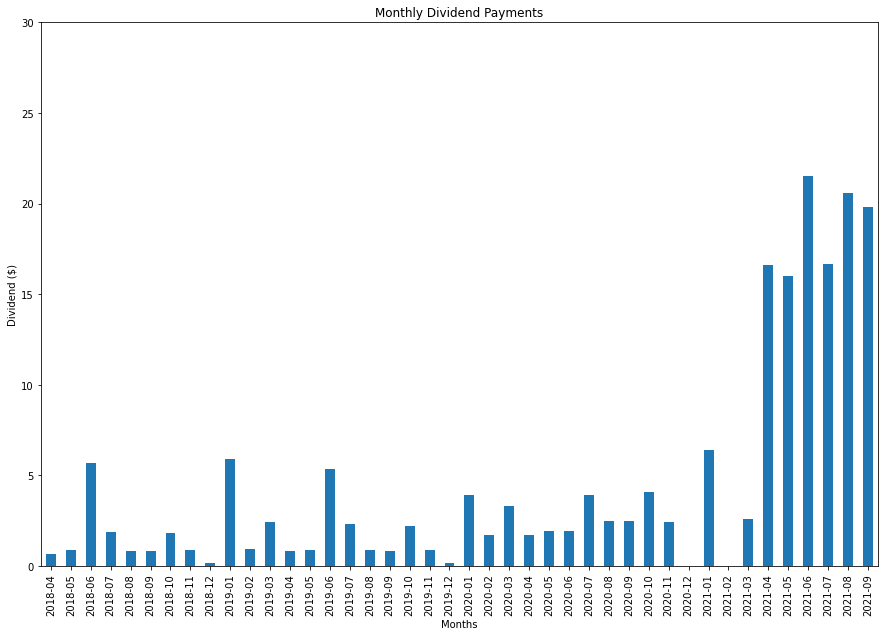

In [9]:
div[:-1].plot(kind='bar',
                    title='Monthly Dividend Payments',
                    xlabel='Months',
                    ylabel='Dividend ($)',
                    figsize=(15, 10),
                    legend=False,
                    ylim=(0, 30))

## Performance Against Benchmark